## Computational Perception Assignment 1 {-}
Feb 4, 2019

### Q1. Signal Detection Theory (25 points) {-}

Assume you measure a signal plus Gaussian noise: $y = x + n$, where $n \sim N(0, \sigma_n)$. -- I'm assuming you mean $σ_{n}^{2}$

Imports and utility functions:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def gaussian_distribution(mu, sigma_squared):
    return lambda a: np.exp(-(a - mu)**2 / (2 * sigma_squared)) / np.sqrt(2 * np.pi * sigma_squared)

def plot_function(f, min=0, max=2, step_size=101, **args):
    x = np.linspace(min, max, step_size)
    y = f(x)
    plt.plot(x, y, **args)


def plot_boundary(x, **args):
    plt.axvline(x, color='red', **args)
    
    
def show_graph():
    plt.grid()
    plt.legend()
    plt.show()

1.1 Calculate and plot the optimal detection threshold overlaid on the distributions of $n$ and $y$. (5 pts)

Since x is a constant signal, y is simply Gaussian noise plus this constant, and so for y's pdf we just add x to the mean of y's normal distribution, effectively shifting it to the right.  Since the variance of this and the pure noise distribution are the same, the point where they intersect is just the midpoint beween their two means, and since by the definition of a pdf this is where $P(Y|X=x)=P(Y|X=0)$, we know this to be the optimal decision boundary/detection threshold.

In [113]:
def gaussian_noise_distribution(mu, sigma_squared):
    return gaussian_distribution(mu, sigma_squared)


def noisy_signal_distribution(signal_amplitude, mu, sigma_squared):
    return gaussian_noise_distribution(mu+signal_amplitude, sigma_squared)

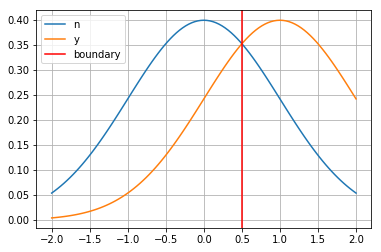

In [114]:
noise_mean, noise_variance = 0, 1
xmin, xmax = -2, 2
signal_amplitude = 1
plot_function(gaussian_noise_distribution(noise_mean, noise_variance), min=xmin, max=xmax, label='n')
plot_function(noisy_signal_distribution(signal_amplitude, noise_mean, noise_variance), min=xmin, max=xmax, label='y')
plot_boundary((2*noise_mean + signal_amplitude)/2, label='boundary')
show_graph()

Generalize this model so that the signal itself is variable, i.e. $x \sim N(\mu_x, \sigma_x)$.  

1.2 Derive the distribution of $y$. (5 pts)

Since the sum of Gaussians is just a Gaussian whose mean is sum of the component Gaussian means and whose variance is the sum of the component Gaussian variances, the pdf of a noisy variable signal, being the sum of a Gaussian signal and Gaussian noise, is itself a Gaussian:

In [115]:
def noisy_gaussian_signal_distribution(mu_x, sigma_squared_x, mu_n, sigma_squared_n):
    return gaussian_distribution(mu_x + mu_n, sigma_squared_x + sigma_squared_n)

Since $y=x+n$, $y∼N(μ_{x}, σ_{x}^{2}) + N(0, σ_{n}) = N(μ_{x}, σ_{x}^{2} + σ_{n}^{2})$.

1.3 Derive the optimal threshold under this model.  State any assumptions you make. (5 pts) 

$p_{y}(x)=p_{n}(x)$

$log[p_{y}(x)]=log[p_{n}(x)]$

$log[p_{y}(x)]-log[p_{n}(x)] = 0$

$\frac{1}{2}[log(\sigma_{n}^{2}) - log(\sigma_{y}^{2}) + \frac{(x-\mu_{n})^{2}}{\sigma_{n}^{2}} - \frac{(x-\mu_{y})^{2}}{\sigma_{y}^{2}}] = 0$

$(-\frac{1}{\sigma_{y}^{2}} + \frac{1}{\sigma_{n}^{2}})x^{2}
+ 2(-\frac{\mu_{n}}{\sigma_{n}^{2}} + \frac{\mu_{y}}{\sigma_{y}^{2}})x
+ \frac{\mu_{n}^{2}}{\sigma_{n}^{2}} - \frac{\mu_{y}^{2}}{\sigma_{y}^{2}} + log(\frac{\sigma_{n}^{2}}{\sigma_{y}^{2}})$
, which is a quadratic we can solve with the quadratic formula.  This can have two solutions, but of course we're only interested in the one where y overtakes n, as this indicates the probability of a signal passes the probability of just noise with increasing certainty.

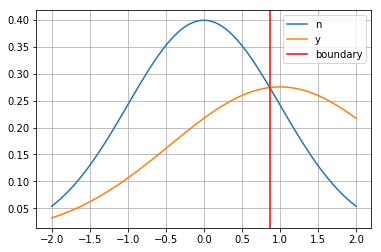

In [123]:
from math import sqrt
import math

sig_mean, sig_variance = 1, 1.1
plot_function(gaussian_noise_distribution(noise_mean, noise_variance), min=xmin, max=xmax, label='n')
plot_function(noisy_gaussian_signal_distribution(sig_mean, sig_variance, noise_mean, noise_variance), min=xmin, max=xmax, label='y')
a = -1/(sig_variance + noise_variance) + 1/noise_variance
b = 2 * (sig_mean + noise_mean) / (sig_variance + noise_variance)
c = -sig_mean**2 /(sig_variance + noise_variance) + math.log(noise_variance/(sig_variance + noise_variance))#-noise_variance * sig_mean**2 * (1 + math.log((sig_variance+noise_variance)/sig_variance)) #(sig_variance + noise_variance)*noise_variance*math.log((sig_variance+noise_variance)/sig_variance)
maybe_boundary = (-b + sqrt(b**2-4*a*c))/(2*a)
plot_boundary(maybe_boundary, label='boundary')
show_graph()

1.4 What are the expressions for the probability of a successful detection (a true positive) and of a false alarm (a false positive)? (5 pts)

True Positive:
$P(TP) = P(detection|signal) = \frac{\int_{x'}^{\infty}y}{\int_{-\infty}^{\infty}y} = \int_{x'}^{\infty}y$, where x' is the decision threshold, since the TP rate is the rate that a signal y present is actually detected over the rate that, given the signal is present, the signal is present and detected plus present and not detected, which integrates to 1.


False Positive:
$P(FP) = P(detection|no signal) = \frac{\int_{x'}^{\infty}n}{\int_{-\infty}^{\infty}n} = \int_{x'}^{\infty}n$, where x' is the decision threshold, since the FP rate is the rate that no signal present n is detected as a signal over the rate that, given no signal is present, the signal is not present and detected plus not present and not detected, which integrates to 1.


1.5 Code a functions to calculate these, and use them to plot the ROC curves for different SNRs. Follow the format in Dusenbery-fig.5.2. You should use a toolbox or package that defines common distributions and a cdf function. (5 pts)

In [781]:
from scipy.stats import norm

def calc_tprate(noisy_sig_mean, variance, boundary):
    return 1 - norm.cdf(boundary, loc=noisy_sig_mean, scale=sqrt(variance))


def calc_fprate(noise_mean, variance, boundary):
    return 1 - norm.cdf(boundary, loc=noise_mean, scale=sqrt(variance))

In [785]:
# here we are again assuming the same variance for signal and signal + noise, an assumption I'm making as do the diagrams
# from class and the readings
def roc_curve(snr):
    variance = 1
    noise_mean, noisy_sig_mean = 0, snr*variance
    tprate, fprate = [0.0], [1.0]
    # iteratively find tp and fp rates for different threshold values
    min_threshold, max_threshold = 0, 5
    threshold_steps = 20
    threshold = max_threshold
    while tprate[-1] < .9999:
        threshold -= .1
        tprate.append(calc_tprate(noisy_sig_mean, variance, threshold))
        fprate.append(calc_fprate(noise_mean, variance, threshold))
    return tprate[1:], fprate[1:]

In [786]:
def plot_roc_graph(curves):
    plt.xlabel('false alarm')
    plt.ylabel('detection')
    plt.gca().twinx()
    plt.ylabel('miss')
    plt.gca().twiny()
    plt.xlabel('correct null')
    for c, curve in enumerate(curves):
        lbl = 'snr=' + str(c)
        plt.plot(curve[1], curve[0], label=lbl)
    plt.legend()
    plt.show()

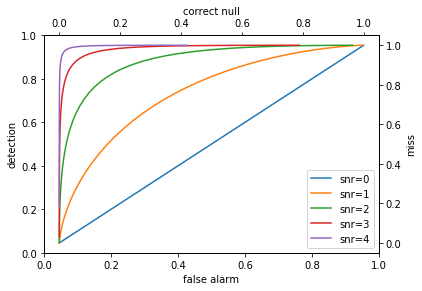

In [787]:
roc_curves = []
for snr in range(0,5):
    roc_curves.append(roc_curve(snr))
plot_roc_graph(roc_curves)

### Q2. Detection in a time-varying signal (15 points) {-}

Now assume your signals are time-varying: $y(t) = x(t) + n(t)$.  Assume again Gaussian noise, $y(t) \sim N(0, \sigma_n)$, and for simplicity, that $t$ is discrete and the measured samples $y(t)$ are independent.  The signal $x(t)$, however, only arrives at random intervals and is zero elsewhere.  Events that arrive at random, independent invervals obey Poisson statistics, and the interval can be modeled with an exponential distribution.

2.1 Write code to generate signals from this model. (5 pts)

In [837]:
# domain: the x axis of the signal
# lamb: lambda parameter of the exponential distribution
def poisson_point_process(domain, lamb, amplitude):
    # get intervals between signal by sampling from exponential distribution
    # and sample the signal at each of those points from the gaussian
    steps = domain.shape[0]
    codomain = np.zeros(domain.shape)
    step = 0
    while True:
        step += int(np.random.exponential(1.0/lamb))
        if step >= steps:
            return codomain
        else:
            codomain[step] = amplitude # the amplitude of the signal isn't important


def poisson_signal(lamb):
    return lambda a: poisson_point_process(a, lamb)

def noisy_poisson_signal(lamb, mu_n, sigma_squared_n):
    return lambda a: poisson_point_process(a, lamb) + np.random.normal(mu_n, sigma_squared_n**.5, a.shape)

2.2 Derive the optimal threshold detector for this scenario.  Be sure to consider the probability of the signal being present in any particular sample.  Contrast this with the threshold in Q1. (5 pts)

The optimal threshold, since it is just between two Gaussians, noise and noise plus a signal of fixed amplitude (when present), is just a special case of the threshold from 1.3:

$(-\frac{1}{\sigma_{y}^{2}} + \frac{1}{\sigma_{n}^{2}})x^{2}
+ 2(-\frac{\mu_{n}}{\sigma_{n}^{2}} + \frac{\mu_{y}}{\sigma_{y}^{2}})x
+ \frac{\mu_{n}^{2}}{\sigma_{n}^{2}} - \frac{\mu_{y}^{2}}{\sigma_{y}^{2}} + log(\frac{\sigma_{n}^{2}}{\sigma_{y}^{2}}) = 0$

Since now the noise plus signal is just the Gaussian noise distribution with its mean shifted to the right as in 1.1, we know that $\sigma_{y}=\sigma_{n}$ and that $\mu_{n}=0$ from the problem definition.  Thus we can simplify to

$2\frac{\mu_{y}}{\sigma_{y}^{2}}x - \frac{\mu_{y}^{2}}{\sigma_{y}^{2}} + log(1) = 0$

$2\mu_{y}x - \mu_{y}^{2} = 0$

$x = \mu_{y}/2$

2.3 Write code to plot your generated signal and illustrate threshold detection with a roughly 95% true positive rate. (5 pts)

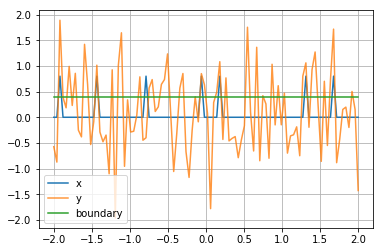

In [848]:
noise_variance = .5
lamb = .1
sig_mean = .8
poisson_signal = poisson_point_process(np.linspace(-2, 2, 100), lamb, sig_mean)
noisy_poisson_signal = np.add(poisson_signal, np.random.normal(noise_mean, noise_variance**.5, poisson_signal.shape))
plt.plot(np.linspace(-2, 2, 100), poisson_signal, label='x')
plt.plot(np.linspace(-2, 2, 100), noisy_poisson_signal, label='y', alpha=.8)

boundary = sig_mean / 2
plt.plot(np.linspace(-2, 2, 100), [boundary for _ in range(100)], label='boundary')
show_graph()

### Q3. Spectra and Spectrograms (15 points) {-}

3.1 Read the bach.wav file and plot its Fourier spectrum. (5 pts)

In [15]:
from scipy.io import wavfile

srate, dataBach = wavfile.read('data/bach.wav')

# normaleze the audio data for easier processing, copied from pgm homework 5
def audionorm(data):
    normalizer = 2**16
    return [i/normalizer for i in data]

signal = audionorm(dataBach)

In [199]:
# plot the fourier spectrum
from scipy.fftpack import fft

signal = audionorm(dataBach)
signal = abs(fft(signal))

(132362,)


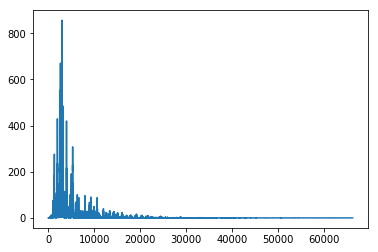

In [200]:
print(signal.shape)
plt.plot(signal[:len(signal)//2])
plt.show()

3.2 Plot the spectrogram (i.e. the time-varying spectrum).  Choose a time interval, windowing, and other parameters such that the individual notes and their harmonics are clearly visible.  Be sure to explain your choices. (5 pts)

In [892]:
def plot_spectrogram(data, time_interval, window_size):
    sampling_frequency = len(data) / time_interval
    plt.specgram(data, Fs=sampling_frequency, NFFT=window_size, window=np.hamming(window_size), noverlap=window_size-1)
    plt.show()

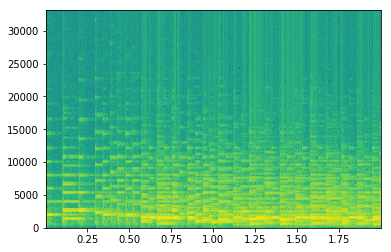

In [893]:
signal = audionorm(dataBach)
plot_spectrogram(signal, 2, 400)

A window size of 400 samples was adequate to make the individual notes and their harmonics clearly visible (which otherwise would have been smeared horizontally at higher window sizes) but still large enough to compute in a reasonable time.  The time interval was adjusted so the spectrogram would be of sufficient resolution as to be human readable.

3.3 Plot the spectrogram of the first note. Follow the format in AN-fig.1.4.  This note is called $E_5$, which is the E above middle C, and in common tunings has a pitch of 659 Hz.  Show that this note roughly matches this frequency. (5 pts)

In [133]:
import sounddevice as sd

# verify this is only the first note
srate, dataBach = wavfile.read('data/bach.wav')
signal = audionorm(dataBach)
sd.play(signal[:7000], srate)

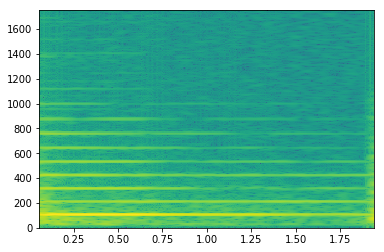

In [895]:
# first let's plot the spectrogram
plot_spectrogram(signal[:7000], 2, 400)

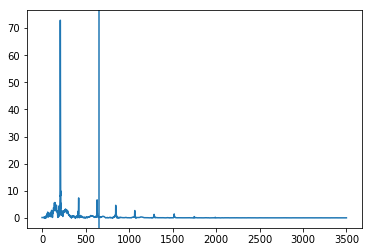

In [342]:
signal = audionorm(dataBach)
trunc_signal = signal[:7000]
f_signal = abs(fft(trunc_signal))
plt.plot(f_signal[:len(f_signal)//2])
plt.axvline(659)

We see a harmonic right around 659Hz, confirming the pitch roughly matches this frequency.

### Q4. Filtering (25 points) {-}

4.1 Write a function to calcuate discrete convolution $y(t) = h(t) * x(t)$.  For pedagogical purposes, do this "by hand", i.e. with for loops, and do not use a built-in function. (5 pts)

$(h*x)(t) = ∑_{𝜏=-∞}^{+∞}h(𝜏)x(t-𝜏)$, but since we can only plot the signal for a discrete window we restrict the sum to within that window in the following convolution function:

In [896]:
def discretely_convolve(h, x):
    y = np.zeros(len(h) + len(x))
    x = np.pad(x, (0, len(h)-len(x)), 'constant', constant_values=(0,))
    for t in range(len(y)):
        for tau in range(len(h)):
            if 0 <= t - tau < len(x):
                y[t] += h[tau] * x[t-tau]
    return y

The convolution can be demonstrated with a square pulse filter:

In [897]:
import numpy.ma as ma

def square_pulse_filter(a):
    x = np.zeros(a.shape)
    x[:15] = -1
    x[2:14] = 5
    return x

def square_pulse():
    return lambda a: np.array([0 < xi < 10 for xi in range(len(a))])

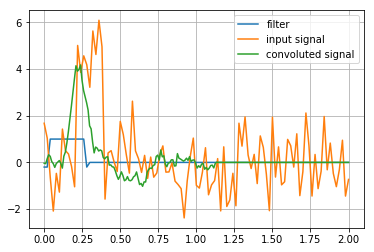

In [899]:
noisy_poisson = lambda a: np.random.normal(0, 1, a.shape)
square_filter = square_pulse_filter(np.linspace(0, 2, 101))*.2
signal = noisy_poisson(np.linspace(0, 2, 101)) + np.roll(square_pulse()(np.linspace(0, 2, 101))*5, 10)
convoluted_signal = discretely_convolve(signal, square_filter)

plt.plot(np.linspace(0, 2, 101), square_filter, label='filter')
plt.plot(np.linspace(0, 2, 101), signal, label='input signal')
# NOTE: I multiplied the convoluted signal by .05 to scale it down for displaying with the other signals, but that's ok
# since the scale isn't the point
plt.plot(np.linspace(0, 2, 202), convoluted_signal*.1, label='convoluted signal')
show_graph()

4.2. Write code to define a low-pass filter.  A simple low-pass filter is a Gaussian with a width defined in samples.  Convolving this will take a weighted average of the samples around $x(t)$. (5 pts)

In [900]:
def low_pass_filter(signal, filter_width):
    lp_filter = gaussian_distribution(.5, .1)(np.linspace(0, 1, filter_width*2))
    plt.plot(np.linspace(0, 1, 100), np.concatenate((lp_filter, np.zeros(100-len(lp_filter)))), label='filter')
    return discretely_convolve(signal, lp_filter)

The low-pass filter can be demonstrated by applying to a Gaussian-modulated sine wave:

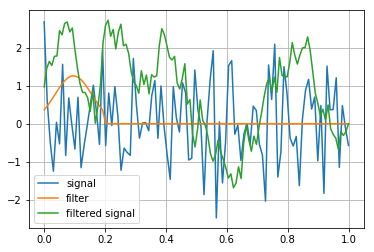

In [906]:
noise = np.random.normal(0, 1, 100) # \gaussian_modulated_sine(100, 100, .5)
domain = np.linspace(0, 1, 100)
plt.plot(domain, noise, label='signal')
filter_width = 10
plt.plot(np.linspace(0, 1, 120), low_pass_filter(noise, filter_width), label='filtered signal')
lp_filter = gaussian_distribution(.5, .1)(np.linspace(0, 1, filter_width*2))
show_graph()

4.3. Apply your filter to bach.wav.  Illustrate and explain what you did. (5 pts)

KeyboardInterrupt: 

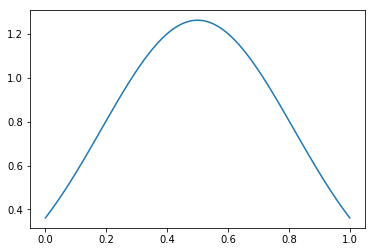

In [618]:
signal = audionorm(dataBach)
filtered_signal = low_pass_filter(np.array(signal), 50)

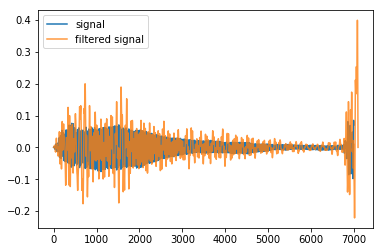

In [601]:
plt.plot(signal, label='signal')
plt.plot(filtered_signal, label='filtered signal', alpha=.8)
plt.legend()
plt.show()
sd.play(filtered_signal, srate)

In applying the filter I've essentially "blurred" the sound to get rid of any high-frequency sounds, that is, those of higher pitch, filtering out some of the treble from the original audio recording.

4.4. Write a function for a Gaussian-modulated sine wave.  It should take as parameters, frequency (in Hz), width (in samples), and standard deviation (in secs). (5 pts)

In [102]:
# frequency in Hz (given sample rate), width in samples, stdev in sec
def gaussian_modulated_sine(frequency, width, stddev):
    domain = np.linspace(-width//2, width//2, width)
    gaussian = gaussian_distribution(0, (stddev * srate)**2)(domain)
    sine = np.sin(domain*frequency*2*math.pi / srate)
    print(domain.shape)
    return gaussian * sine

(100,)


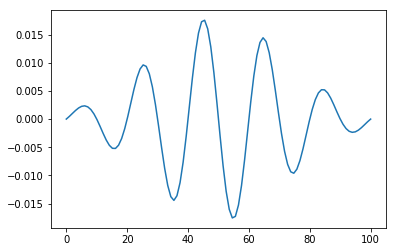

In [111]:
plt.plot(np.linspace(0, 100, 100), gaussian_modulated_sine(22050*5, 100, .001))
plt.show()

4.5 Use your above function to make a "matched" filter for the first note.  Convolve this filter with bach.wav and illustrate the extent to which this simplistic scheme is able to detect occurences of the note $E_5$ in the audio.

We know from problem 3 that $E_5$ is approximately 659 Hz, so this is what we'll set our frequency to.  We also know the approximate width from plotting the spectrogram, so the only parameter that has to be found out is the standard deviation.  Instead of the function I wrote, I'm using numpy's convolution function because it is faster:

(7000,)


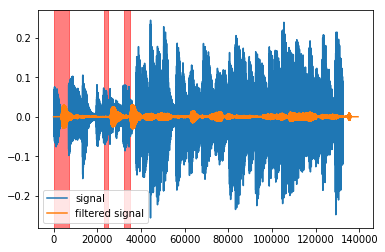

In [258]:
signal = audionorm(dataBach)

filtered_signal = np.convolve(signal, gaussian_modulated_sine(659, 7000, .007))

plt.plot(signal, label='signal')
plt.plot(filtered_signal, label='filtered signal')
plt.legend()
plt.axvspan(0, 7000, color='red', alpha=0.5)
plt.axvspan(23000, 25000, color='red', alpha=0.5)
plt.axvspan(32000, 35000, color='red', alpha=0.5)

plt.show()
sd.play(signal[0:7000], srate)
sd.play(signal[23000:25000], srate)
sd.play(signal[32000:35000], srate)

Even with such a simple filter, we are easily able to pick out the first three $E_5$ notes, highlighted in red.

### Q5. Questions about the Readings (10 points) {-}

5.1 Summarize the evidence that we can detect single photons. (5 pts)

The probability of detecting a signal composed of N photons can be characterized as the pdf of a Poisson random variable, parameterized by the number of photons actually absorbed k.  This fits experimental observations better than other distributions, particularly when k is somewhere in the range of 2-10 photons, meaning that any one photoreceptor almost definitely did not absorb multiple photons given how many exist in the eye, and thus must have detected a single photon.  Additionally, the distribution of intensity scores of visual stimuli in experiments align almost perfectly with this Poisson model.  Furthermore, retinal cells extracted from animals have been shown to respond to single photons with detection accuracy of 99%.  Finally, given the sparsity of photons for the retina to absorb at night, it would not be possible given our current understanding of retinal processing for humans to have nightvision at our known level of effectiveness.

5.2 Summarize the evidence that the some animals can detect sounds that result in *subatomic* vibrations of their eardrum. (5 pts)

Given a model of hearing as a series of instantaneous measurements of hair cell stereocilia, the noise of the signal is equivalent to the equipartition noise of the cilia.  In some animals such as turtles, guinea pigs and cats, this means their cilia have a noise level of only around 1mV, corresponding to a displacement noise on the order of $10^{-10}m$.  Even with this level of accuracy, experiments have shown that hair cells are able to detect signals around 25dB smaller than this estimate, suggesting the existence of a noise-filtering mechanism.  One possibility is an active feedback mechanism from the application of a feedback force, which would reduce thermal noise.  This aligns with observations of acoustic emissions from the ear itself, and with the fact that the probability distribution of sound pressure in the ear is locally minimal around zero, implying an unstable system, and with observed violations of equipartition theorems.  Noise from quantum mechanics is still about an order of magnitude smaller than the signal detection threshold.  Thus, in some cases sound detection is possible at the level of subatomic vibrations.  

### Q6. Exploration (10 points) {-}


We can generalize the convolution operation to two dimensions, by iterating the sum over both the x and y dimensions:

In [32]:
def convolve_2d(h, x):
    y = np.zeros((h.shape[0]+x.shape[0], h.shape[1]+x.shape[1]))
    for row in range(y.shape[0]):
        for col in range(y.shape[1]):
            for row_tau in range(h.shape[0]):
                for col_tau in range(h.shape[1]):
                    if 0 <= row - row_tau < x.shape[0] and 0 <= col - col_tau < x.shape[1]:
                        y[row, col] += h[row_tau, col_tau] * x[row-row_tau, col-col_tau]
    return y

This allows us to do convolutions over images.  Next I apply a "vertical edge detector" like the one in the reading to a vertical and diagonal edge image.  I display the input image, filter, the output of the convolution and the result of convoluting with the scipy library to demonstrate correctness.  Note that because of the nature of the convolution function, by subtracting tau from t, the displayed filter is essentially flipped with regards to what we would think of when superimposing the filter on the image.

In [67]:
def show_image_convolution(img, img_filter):
    convoluted_img = convolve_2d(img, img_filter)
    print('INPUT')
    plt.imshow(img, cmap='gray')
    plt.show()
    print('FILTER')
    plt.imshow(img_filter, cmap='gray')
    plt.show()
    print('OUTPUT')
    plt.imshow(convoluted_img, cmap='gray')
    plt.show()
    print('GROUND TRUTH')
    plt.imshow(convolve2d(img, img_filter), cmap='gray')

INPUT


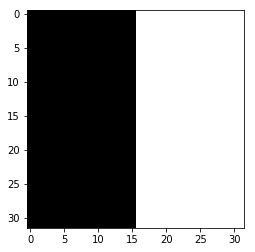

FILTER


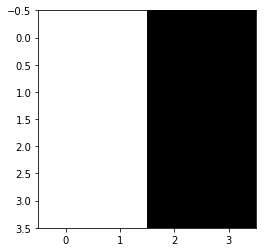

OUTPUT


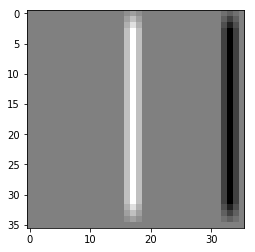

GROUND TRUTH


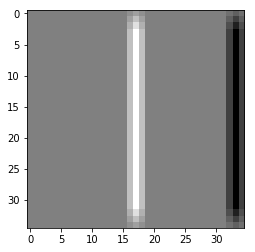

In [68]:
from scipy.signal import convolve2d
img = np.zeros((32, 32))
img[:,16:] = 1
img_filter = np.ones((4, 4))
img_filter[:,2:] = -1
show_image_convolution(img, img_filter)

For a vertical line, we can see a vertical bar in the response signal where the vertical edge is, indicating detection.  This is where the excitatory portion of the filter (the ones/white region) is stimulated while the inhibitory region (the negative ones/black region) is not.  On the right edge, the inhibitory region overpowers the excitatory simply as a border effect of reaching the edge of the convolution.  Everywhere else, while the filter is passed over an all white or all black region, the excitatory and inhibitory halves of the filter are stimulated in equal measure and thus cancel each other out.

INPUT


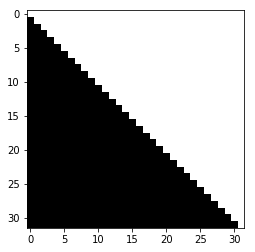

FILTER


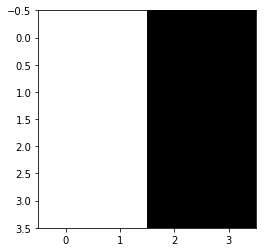

OUTPUT


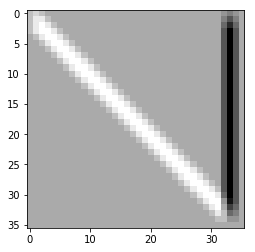

GROUND TRUTH


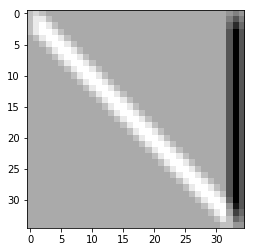

In [70]:
img = np.ones((32, 32))
for r in range(len(img)):
    for c in range(r):
        img[r,c] = 0
img_filter = np.ones((4, 4))
img_filter[:,2:] = -1
show_image_convolution(img, img_filter)

For a diagonal line, we see a less sharp response as the filter passes along the diagonal.  This makes sense because our "vertical line detector" still picks up a signal from non-vertical lines as the excitatory and inhibitory regions of the filter are stimulated unequally at the edge.

INPUT


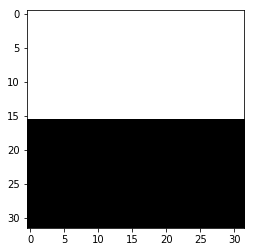

FILTER


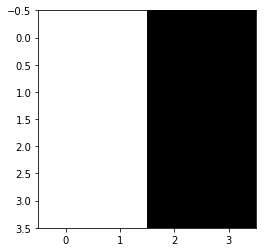

OUTPUT


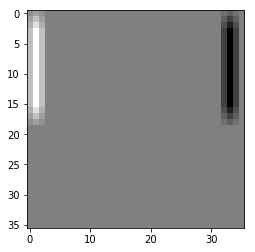

GROUND TRUTH


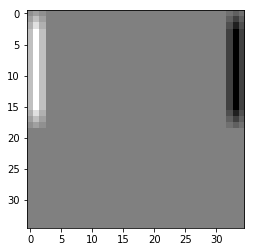

In [71]:
img = np.zeros((32, 32))
img[:16,:] = 1
img_filter = np.ones((4, 4))
img_filter[:,2:] = -1
show_image_convolution(img, img_filter)

Finally, passing the vertical edge filter over a horizontal edge yields no response excepting that from reaching the edges of the convolution domain.  This is as expected because even if the filter is passing over the horizontal edge, the number of pixels in the excitatory region and inhibitory region is still the same and so they cancel each other out.